In [1]:
from astropy.io import fits
from astropy.table import Table
import umap
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

2024-03-12 15:19:38.812573: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataf = fits.open('../data/sw_input.fits')
data = Table(dataf[1].data).to_pandas()
dataf.close()

In [7]:
reducer = umap.UMAP()

In [4]:
cols = ['flux_u', 'flux_g', 'flux_r', 'flux_i', 'flux_z']#, 'flux_w1', 'flux_w2', 
         # 'flux_w3', 'flux_w4' ]

sample = data[cols].sample(n=2000)
umap_data = RobustScaler().fit_transform(sample.values)

In [10]:
%%time
embedding = reducer.fit_transform(umap_data)
# embedding.shape

# embedding = umap_data

CPU times: user 21.2 s, sys: 2 s, total: 23.2 s
Wall time: 14.5 s


(-4.0, 7.0)

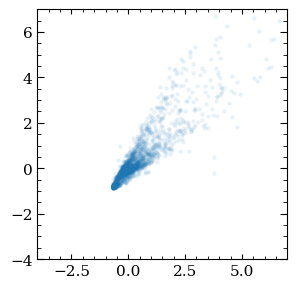

In [15]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    alpha=0.1
    # c = sample['flux_g']/sample['flux_i']
)

plt.xlim(-4,7)
plt.ylim(-4,7)
